In [5]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [6]:
from py_utils.TSP_utils import TSP_plotter, TSP_generator, TSP_loader
import numpy as np
from py_utils.FINDER_test_utils import *
import os
from tabulate import tabulate
from bokeh.io import export_png, export_svgs
from bokeh.models import ColumnDataSource, DataTable, TableColumn

In [7]:
from py_utils.TSP_solver import TSP_solver

# Load test results

In [22]:
model_path_2 =  'best_models/tsp_2d/nrange_15_20_len_1011194/'
model_file_2, model_base_path, tour_length = get_model_file(model_path_2)
model_name = model_file_2.split('.')[0]
print(model_name)
folder = 'real_samples'
result_dir = f'results/{folder}/'
data_dir = f'test_sets/{folder}/'
fnames, approx_ratios, test_lengths, solutions = get_data_from_result_files(data_dir, result_dir, model_name)

Best model file: nrange_15_20_iter_1500_len_1011194.ckpt
nrange_15_20_iter_1500_len_1011194


In [50]:
true_lengths_dict = get_len_dict(data_dir)
predicted_lengths_dict = dict(zip(fnames, test_lengths))
approx_ratio_dict = dict(zip(fnames, approx_ratios))

In [49]:
df_dict = {}
df_dict['Sample name'] = []
df_dict['Optimal length'] = []
df_dict['Predicted length'] = []
df_dict['Approximation ratio'] = []
for key in true_lengths_dict:
    df_dict['Sample name'].append(key)
    df_dict['Optimal length'].append(int(true_lengths_dict[key]))
    df_dict['Predicted length'].append(predicted_lengths_dict[key])
    df_dict['Approximation ratio'].append(approx_ratio_dict[key])

df = pd.DataFrame(df_dict)

# Visualize results

In [65]:
print(tabulate(df.set_index('Sample name'), headers=df.columns, tablefmt='simple'))

Sample name      Optimal length    Predicted length    Approximation ratio
-------------  ----------------  ------------------  ---------------------
berlin52.tsp               7542                8308                1.10156
eil76.tsp                   538                 587                1.09108
kroA100.tsp               21282               23590                1.10845
kroB100.tsp               22141               22879                1.03333
kroC100.tsp               20749               23174                1.11687
kroD100.tsp               21294               22053                1.03564
pr76.tsp                 108159              114828                1.06166
rat99.tsp                  1211                1294                1.06854
st70.tsp                    675                 709                1.05037


In [61]:

def save_df_as_image(df, path):
    source = ColumnDataSource(df)
    df_columns = [df.index.name]
    df_columns.extend(df.columns.values)
    columns_for_table=[]
    for column in df_columns:
        columns_for_table.append(TableColumn(field=column, title=column))
    data_table = DataTable(source=source, columns=columns_for_table,height_policy="auto",width_policy="auto",index_position=None)
    export_png(data_table, filename=path)

In [64]:
save_df_as_image(df.set_index('Sample name'), path='plots/real_test_results')

RuntimeError: Neither firefox and geckodriver nor a variant of chromium browser and chromedriver are available on system PATH. You can install the former with 'conda install -c conda-forge firefox geckodriver'.

# Visualize specific TSP tours

In [8]:
data_dir = 'test_sets/real_samples'
raw_graphs, prepared_graphs, fnames = prepare_real_samples(data_dir)

In [9]:
plotter = TSP_plotter()

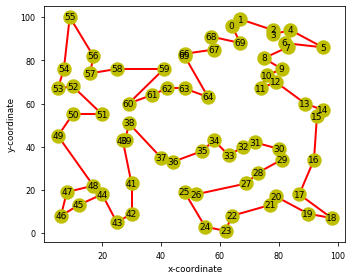

In [10]:
plotter.plot_nx_graph(raw_graphs[1], draw_edges=False, tour_length=None, solution=solutions[1], title='')